# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
fraud = pd.read_csv('Fraud.csv')

In [3]:
# Sample of 100000 rows
fraud_sample = fraud.sample(n=100000, random_state=42)

fraud_sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [4]:
print(fraud_sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3737323 to 6142173
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 9.2+ MB
None


In [5]:
fraud_sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,243.709070,1.805811e+05,8.366804e+05,8.582234e+05,1.104193e+06,1.230055e+06,0.001410,0.000010
std,142.518613,5.586699e+05,2.901104e+06,2.936799e+06,3.223011e+06,3.475326e+06,0.037524,0.003162
min,1.000000,9.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.350821e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,240.000000,7.603086e+04,1.393850e+04,0.000000e+00,1.387482e+05,2.185786e+05,0.000000,0.000000
75%,335.000000,2.091130e+05,1.070771e+05,1.464169e+05,9.605963e+05,1.126011e+06,0.000000,0.000000
max,736.000000,3.697390e+07,3.359321e+07,3.388709e+07,2.362896e+08,2.724047e+08,1.000000,1.000000


isFraud
0    99859
1      141
Name: count, dtype: int64


C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


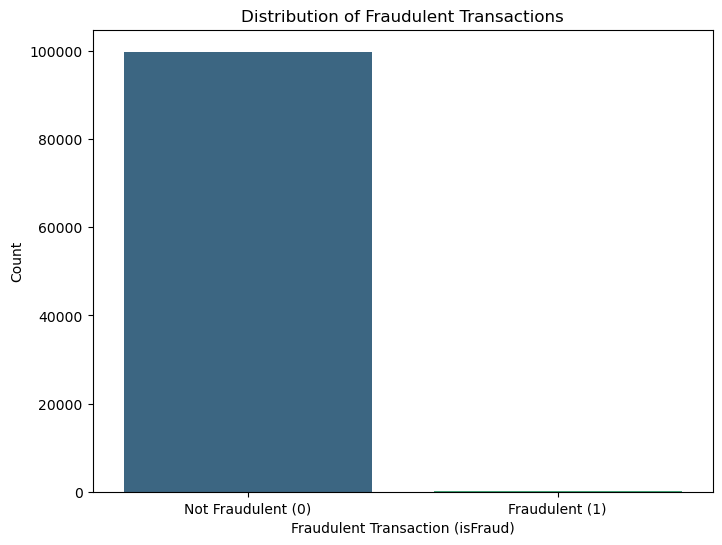

In [6]:
# Check the distribution of the target variable
class_counts = fraud_sample['isFraud'].value_counts()
print(class_counts)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Fraudulent Transaction (isFraud)')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Transactions')
plt.xticks([0, 1], ['Not Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

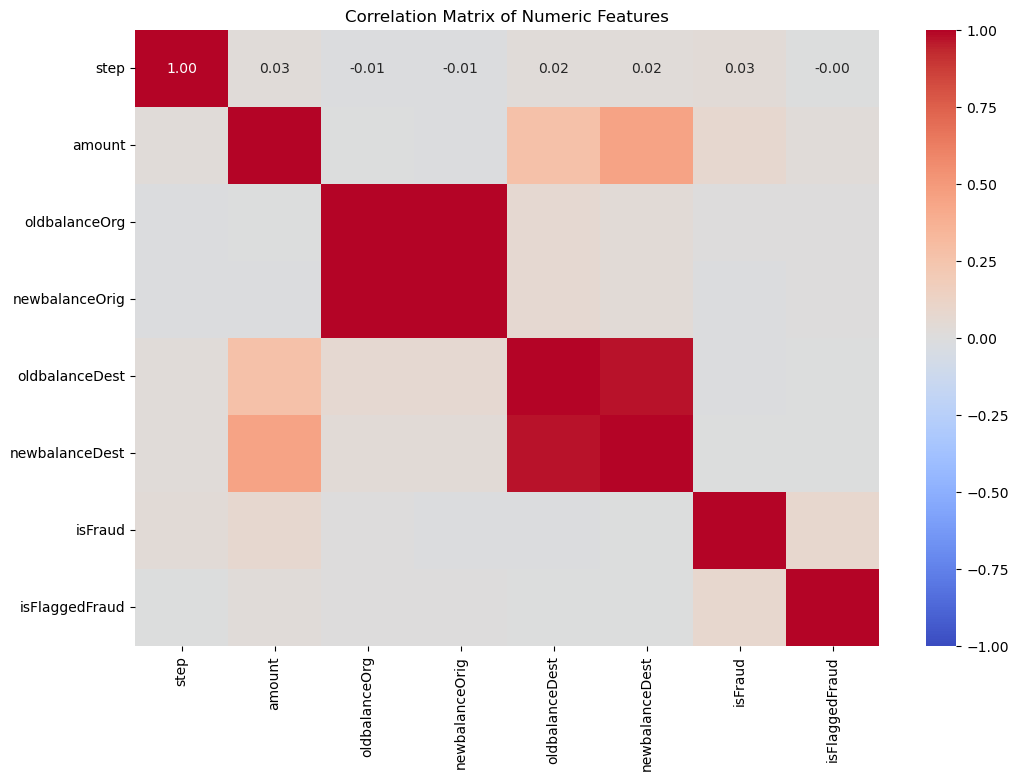

In [7]:
# Filter numeric columns only
numeric_fraud = fraud_sample.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_fraud.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [8]:
# Display correlations with the target variable 'isFraud'
if 'isFraud' in numeric_fraud.columns:
    correlations_with_target = corr_matrix['isFraud'].sort_values(ascending=False)
    print(correlations_with_target)

isFraud           1.000000
isFlaggedFraud    0.084156
amount            0.077999
step              0.034990
oldbalanceOrg     0.006952
newbalanceDest   -0.004081
oldbalanceDest   -0.009096
newbalanceOrig   -0.010106
Name: isFraud, dtype: float64


### What is the distribution of the outcome? 

In [9]:
"""
Not Fraudulent (0): 99,859 transactions
Fraudulent (1): 141 transactions
The distribution of the isFraud outcome in the sample dataset shows a significant class imbalance.
"""

'\nNot Fraudulent (0): 99,859 transactions\nFraudulent (1): 141 transactions\nThe distribution of the isFraud outcome in the sample dataset shows a significant class imbalance.\n'

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [10]:
# Check for missing values
missing_values = fraud_sample.isnull().sum()
missing_values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# Drop columns that are not useful
fraud_sample = fraud_sample.drop(columns=['nameOrig', 'nameDest'])

In [12]:
# Encode categorical features
fraud_sample['type'] = LabelEncoder().fit_transform(fraud_sample['type'])

In [13]:
# Feature and target separation
X = fraud_sample.drop(columns=['isFraud'])
y = fraud_sample['isFraud']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Run a logisitc regression classifier and evaluate its accuracy.

In [19]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Print classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Print the accuracy score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     29960
           1       0.04      0.85      0.08        40

    accuracy                           0.98     30000
   macro avg       0.52      0.91      0.54     30000
weighted avg       1.00      0.98      0.99     30000

Logistic Regression Accuracy: 0.9754


In [ ]:
"""
The model performs very well for the majority class (non-fraudulent transactions), as reflected in the high precision, recall, 
and F1-score for class 0. However, the model struggles with the minority class (fraudulent transactions), showing very low 
precision and F1-score for this class. This suggests that while the model is accurate overall, it may not be effectively 
identifying fraudulent transactions.
"""

### Now pick a model of your choice and evaluate its accuracy.

In [20]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [21]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

In [22]:
# Evaluate the Random Forest model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29960
           1       1.00      0.62      0.77        40

    accuracy                           1.00     30000
   macro avg       1.00      0.81      0.88     30000
weighted avg       1.00      1.00      1.00     30000

Random Forest Accuracy: 0.9995


### Which model worked better and how do you know?

In [17]:
"""
The Random Forest Classifier performed better than the Logistic Regression Model in handling class imbalance:
-Better Recall: The Random Forest model has a higher recall for fraudulent transactions, which is crucial for identifying rare events like fraud.
-Balanced Performance: The model achieves high precision, recall, and F1-Score across both classes, providing a more balanced performance.
-Handling Imbalance: The class_weight parameter in Random Forest helps manage class imbalance more effectively than Logistic Regression alone.
The Random Forest Classifier appears to be a more suitable choice for thefraud detection due to its improved performance on the minority class and its robustness in handling class imbalances.
"""

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.